# Student Performance Indicator Project (by June Kim)

## Life Cycle of Machine Learning
- Problem Statement
- Data Collection
- Exploratory data analysis (EDA)
- Data pre-processing
- Model Training
- Choose the best model

## 1) Problem statement
- The purpose of the project is to understand how students' performance (test scores) are affected by other variables such as Gender, Ethnicity,
Parental level of education, Lunch and Test preparation.

## 2) Data Collection
- Dataset Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Data consists of 8 columns and 1000 rows.

## 2.1 Import Data and Required Packages

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('data/students.csv')
print(df.shape)
df.head()


(1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Perform data check
- Check missing values
- Check Duplicates
- Check data type
- Check # of unique values for each column
- Check statistics of dataset
- Check categorical values

### 3.1 Check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check unique values for columns

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation:
- From the description above, all means are very close to each other (66~69).
- The standard deviation for each features are also similar to each other.

### 3.6 Unique values from each columns

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
#excluding numerical values (scores columns)
print('The unique categories in \'gender\' are : ', df['gender'].unique())
print('The unique categories in \'race_ethnicity\' are : ', df['race_ethnicity'].unique())
print('The unique categories in \'parental_level_of_education\' are : ', df['parental_level_of_education'].unique())
print('The unique categories in \'lunch\' are : ', df['lunch'].unique())
print('The unique categories in \'test_preparation_course\' are : ', df['test_preparation_course'].unique())

The unique categories in 'gender' are :  ['female' 'male']
The unique categories in 'race_ethnicity' are :  ['group B' 'group C' 'group A' 'group D' 'group E']
The unique categories in 'parental_level_of_education' are :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique categories in 'lunch' are :  ['standard' 'free/reduced']
The unique categories in 'test_preparation_course' are :  ['none' 'completed']


In [16]:
#define numerical & categorical columns
numerical_cols = [col for col in df.columns if df[col].dtype != 'O'] #if the content is not an object type
categorical_cols = [col for col in df.columns if df[col].dtype == 'O'] #if the content is an object type

print('{} numerical features : {}'.format(len(numerical_cols), numerical_cols))
print('{} numerical features : {}'.format(len(categorical_cols), categorical_cols))

3 numerical features : ['math_score', 'reading_score', 'writing_score']
5 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Add "Total Score" and "Average" (Feature engineering)
- We let total score and average to be dependent features.

In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [19]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
math_fullmark = df[df['math_score'] == 100]['total_score'].count()
reading_fullmark = df[df['reading_score'] == 100]['total_score'].count()
writing_fullmark = df[df['writing_score'] == 100]['total_score'].count()

print(f"# of students with full mark in math : {math_fullmark}")
print(f"# of students with full mark in reaidng : {reading_fullmark}")
print(f"# of students with full mark in writing : {writing_fullmark}")

# of students with full mark in math : 7
# of students with full mark in reaidng : 17
# of students with full mark in writing : 14


In [28]:
math_less_30 = df[df['math_score'] <= 30]['total_score'].count()
reading_less_30 = df[df['reading_score'] <= 30]['total_score'].count()
writing_less_30 = df[df['writing_score'] <= 30]['total_score'].count()

print(f"# of students with less than 30 marks in math : {math_less_30}")
print(f"# of students with less than 30 marks in reaidng : {reading_less_30}")
print(f"# of students with less than 30 marks in writing : {writing_less_30}")

# of students with less than 30 marks in math : 16
# of students with less than 30 marks in reaidng : 8
# of students with less than 30 marks in writing : 10


- Observation  
From the results above, students perform the worst in Math.  
Students perform the best in Reading.

## 4. Data visualization

### 4.1 Visualize average score distribution
- Histogram
- Kernel distribution Function (KDE)

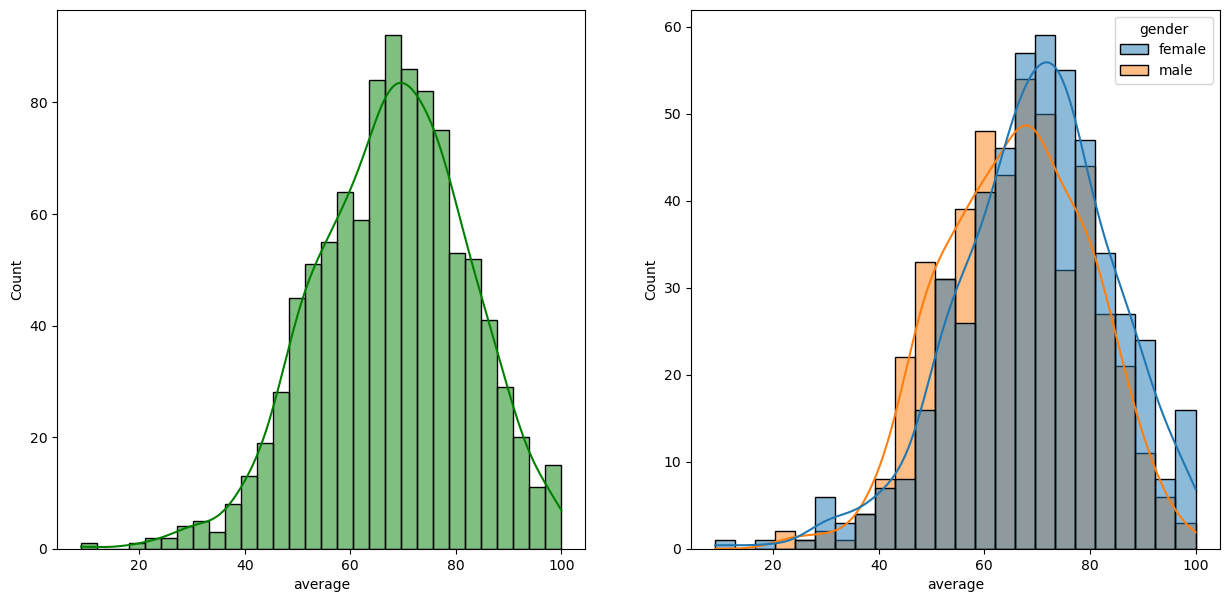

In [33]:
#average score
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

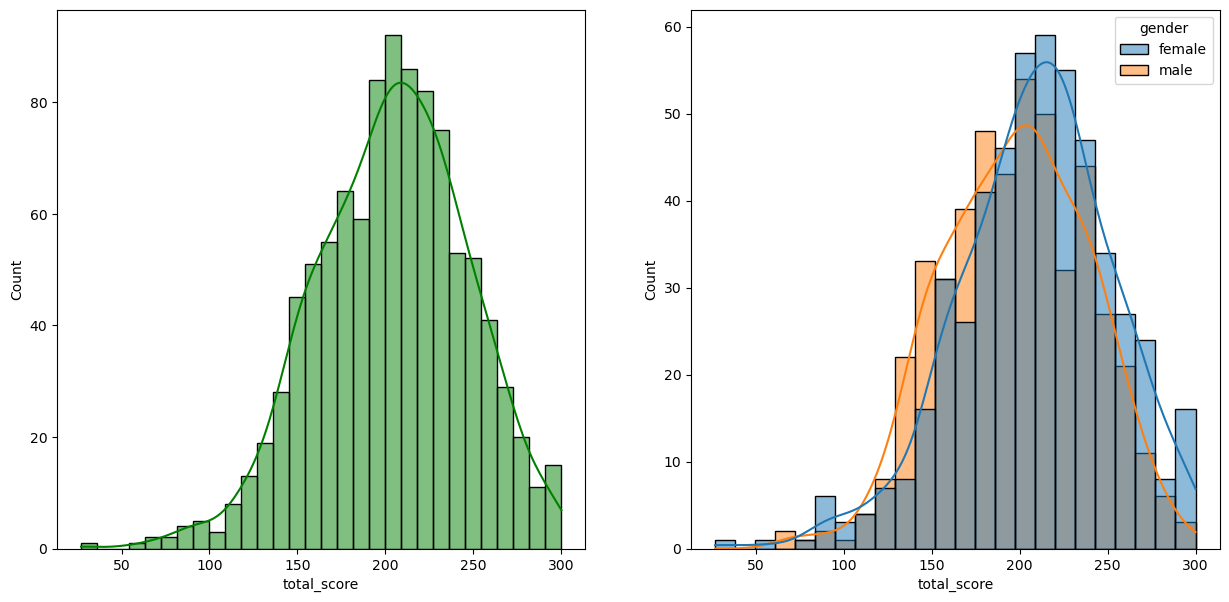

In [34]:
#total_score
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

- Observation  
Female students tend to perform better than male students

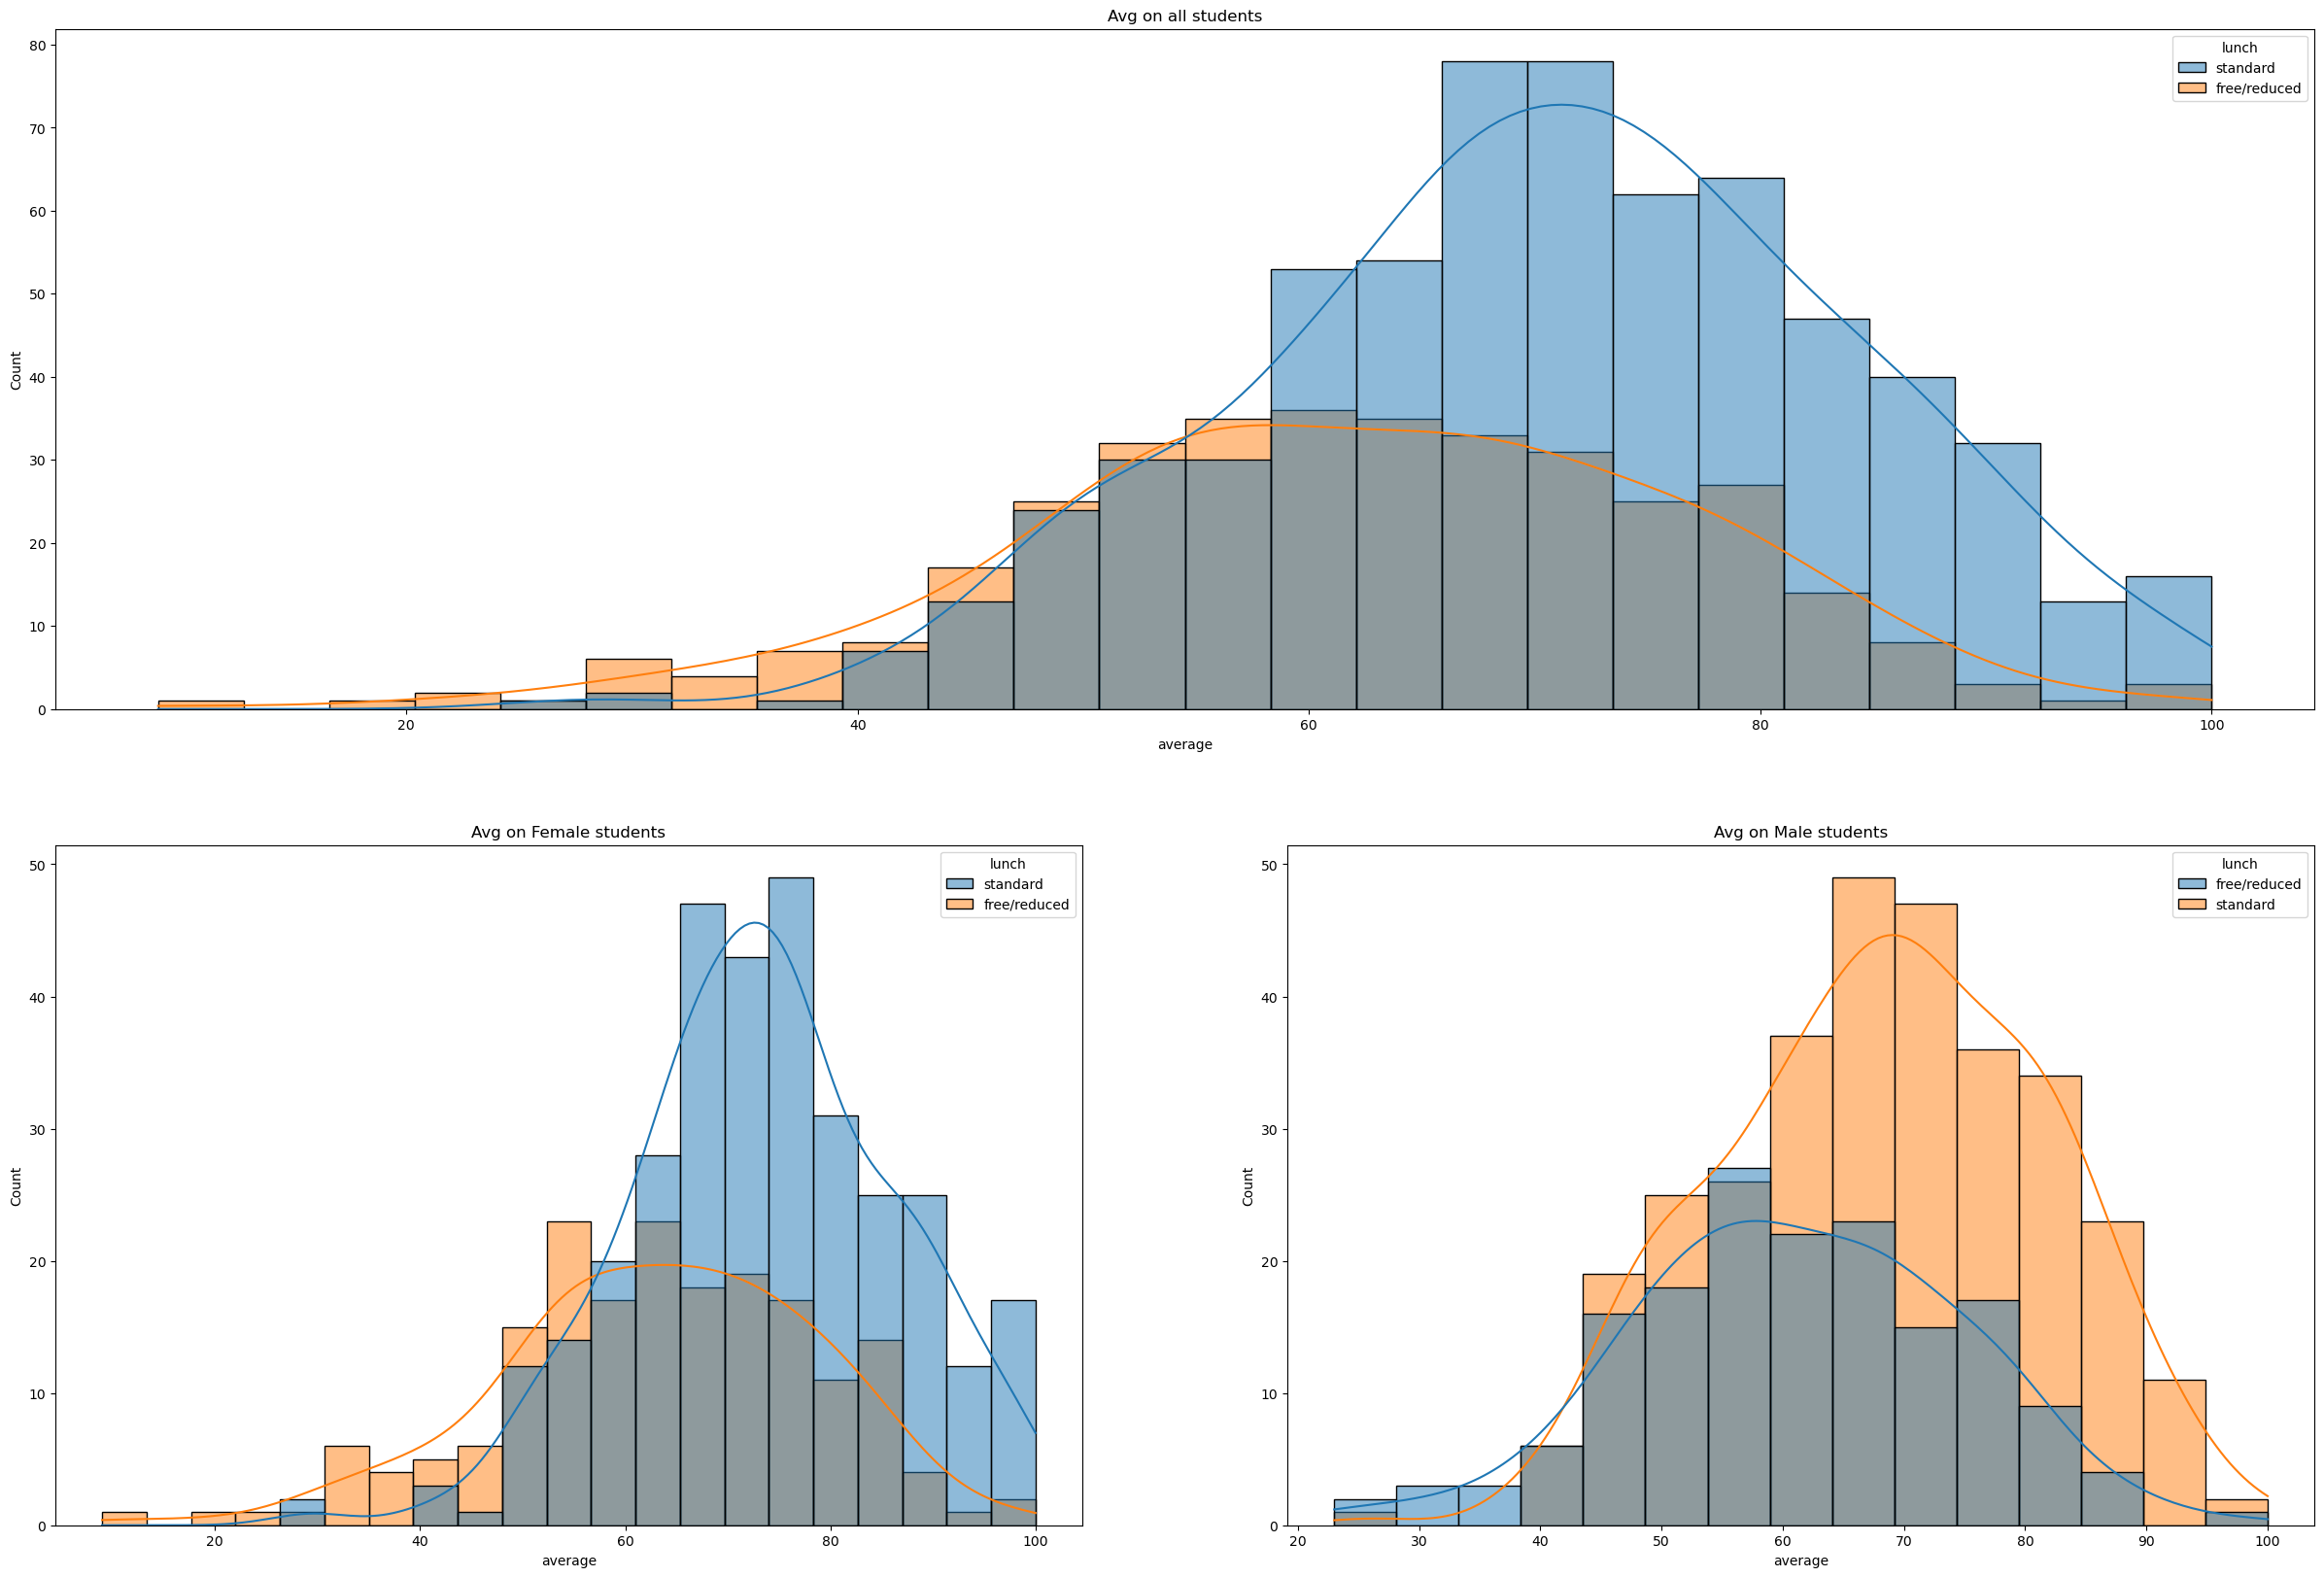

In [82]:
#lunch
plt.subplots(figsize=(30,20))
plt.subplot(211)
plt.title("Avg on all students")
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(223)
plt.title("Avg on Female students")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(224)
plt.title("Avg on Male students")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

- Observation  
Standard lunch helps students perform better in test for both gender.

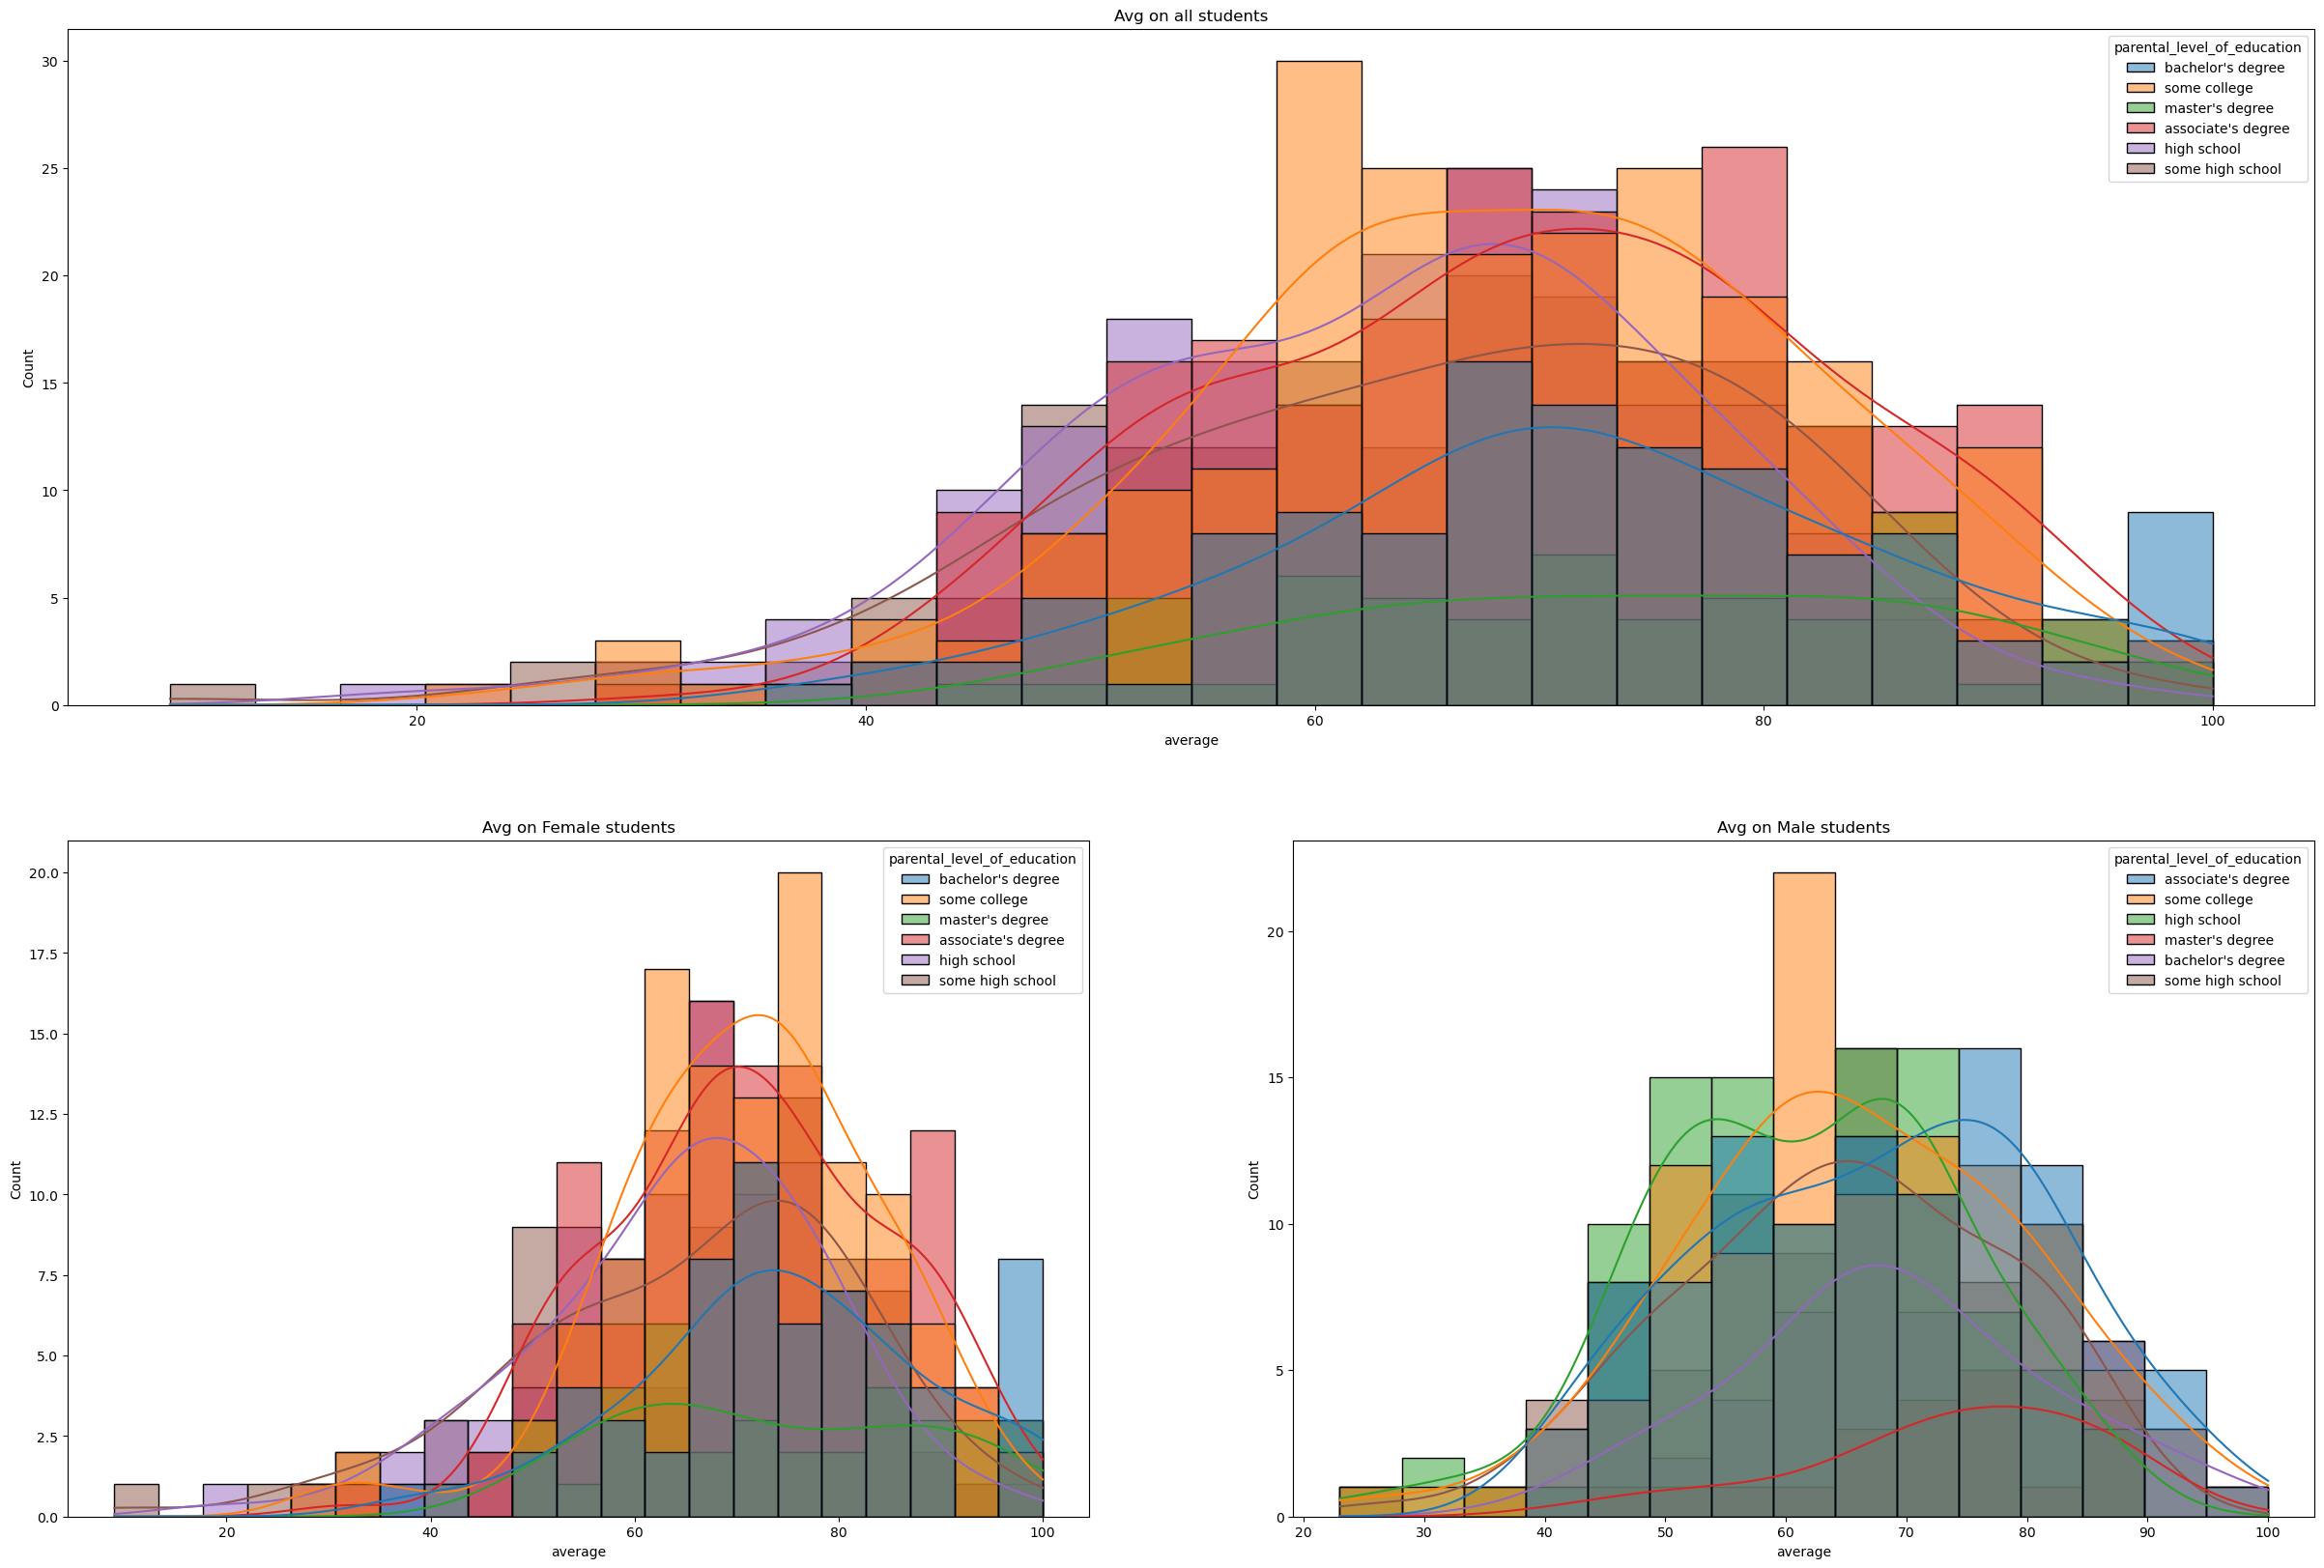

In [125]:
#parent education level
plt.subplots(figsize=(30,20))
plt.subplot(211)
plt.title("Avg on all students")
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(223)
plt.title("Avg on Female students")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(224)
plt.title("Avg on Male students")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

- Observation  
In general, parental level of education doesn't seem to help students perform well on test.

### 4.2 Distribution for each subject using violin plot

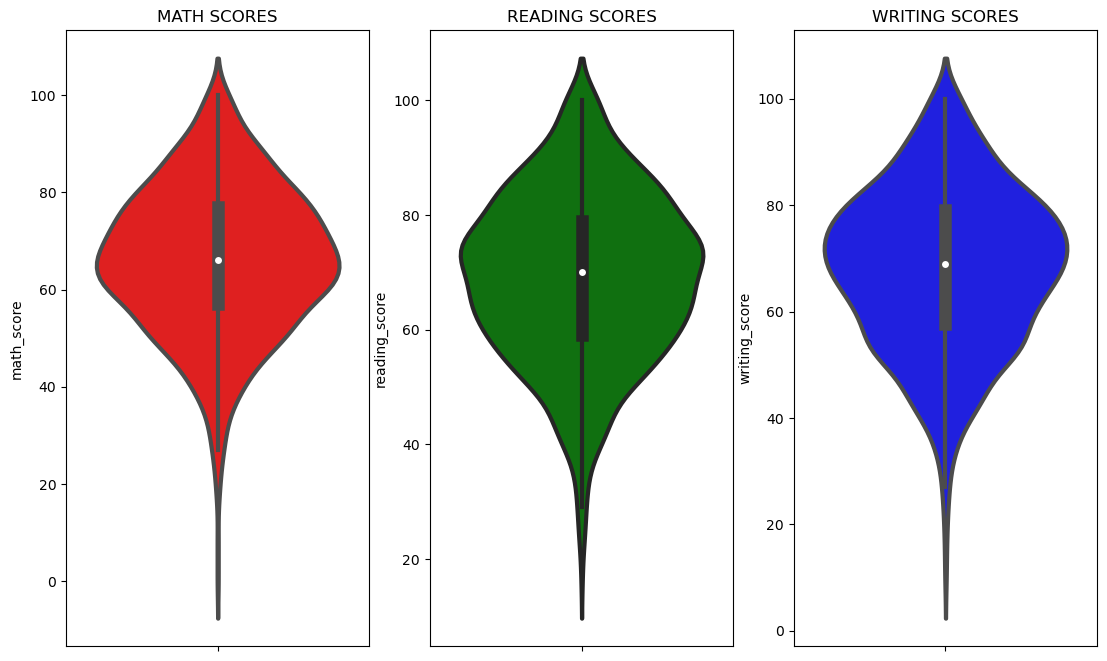

In [85]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### 4.3 Visualize distribution with piechart

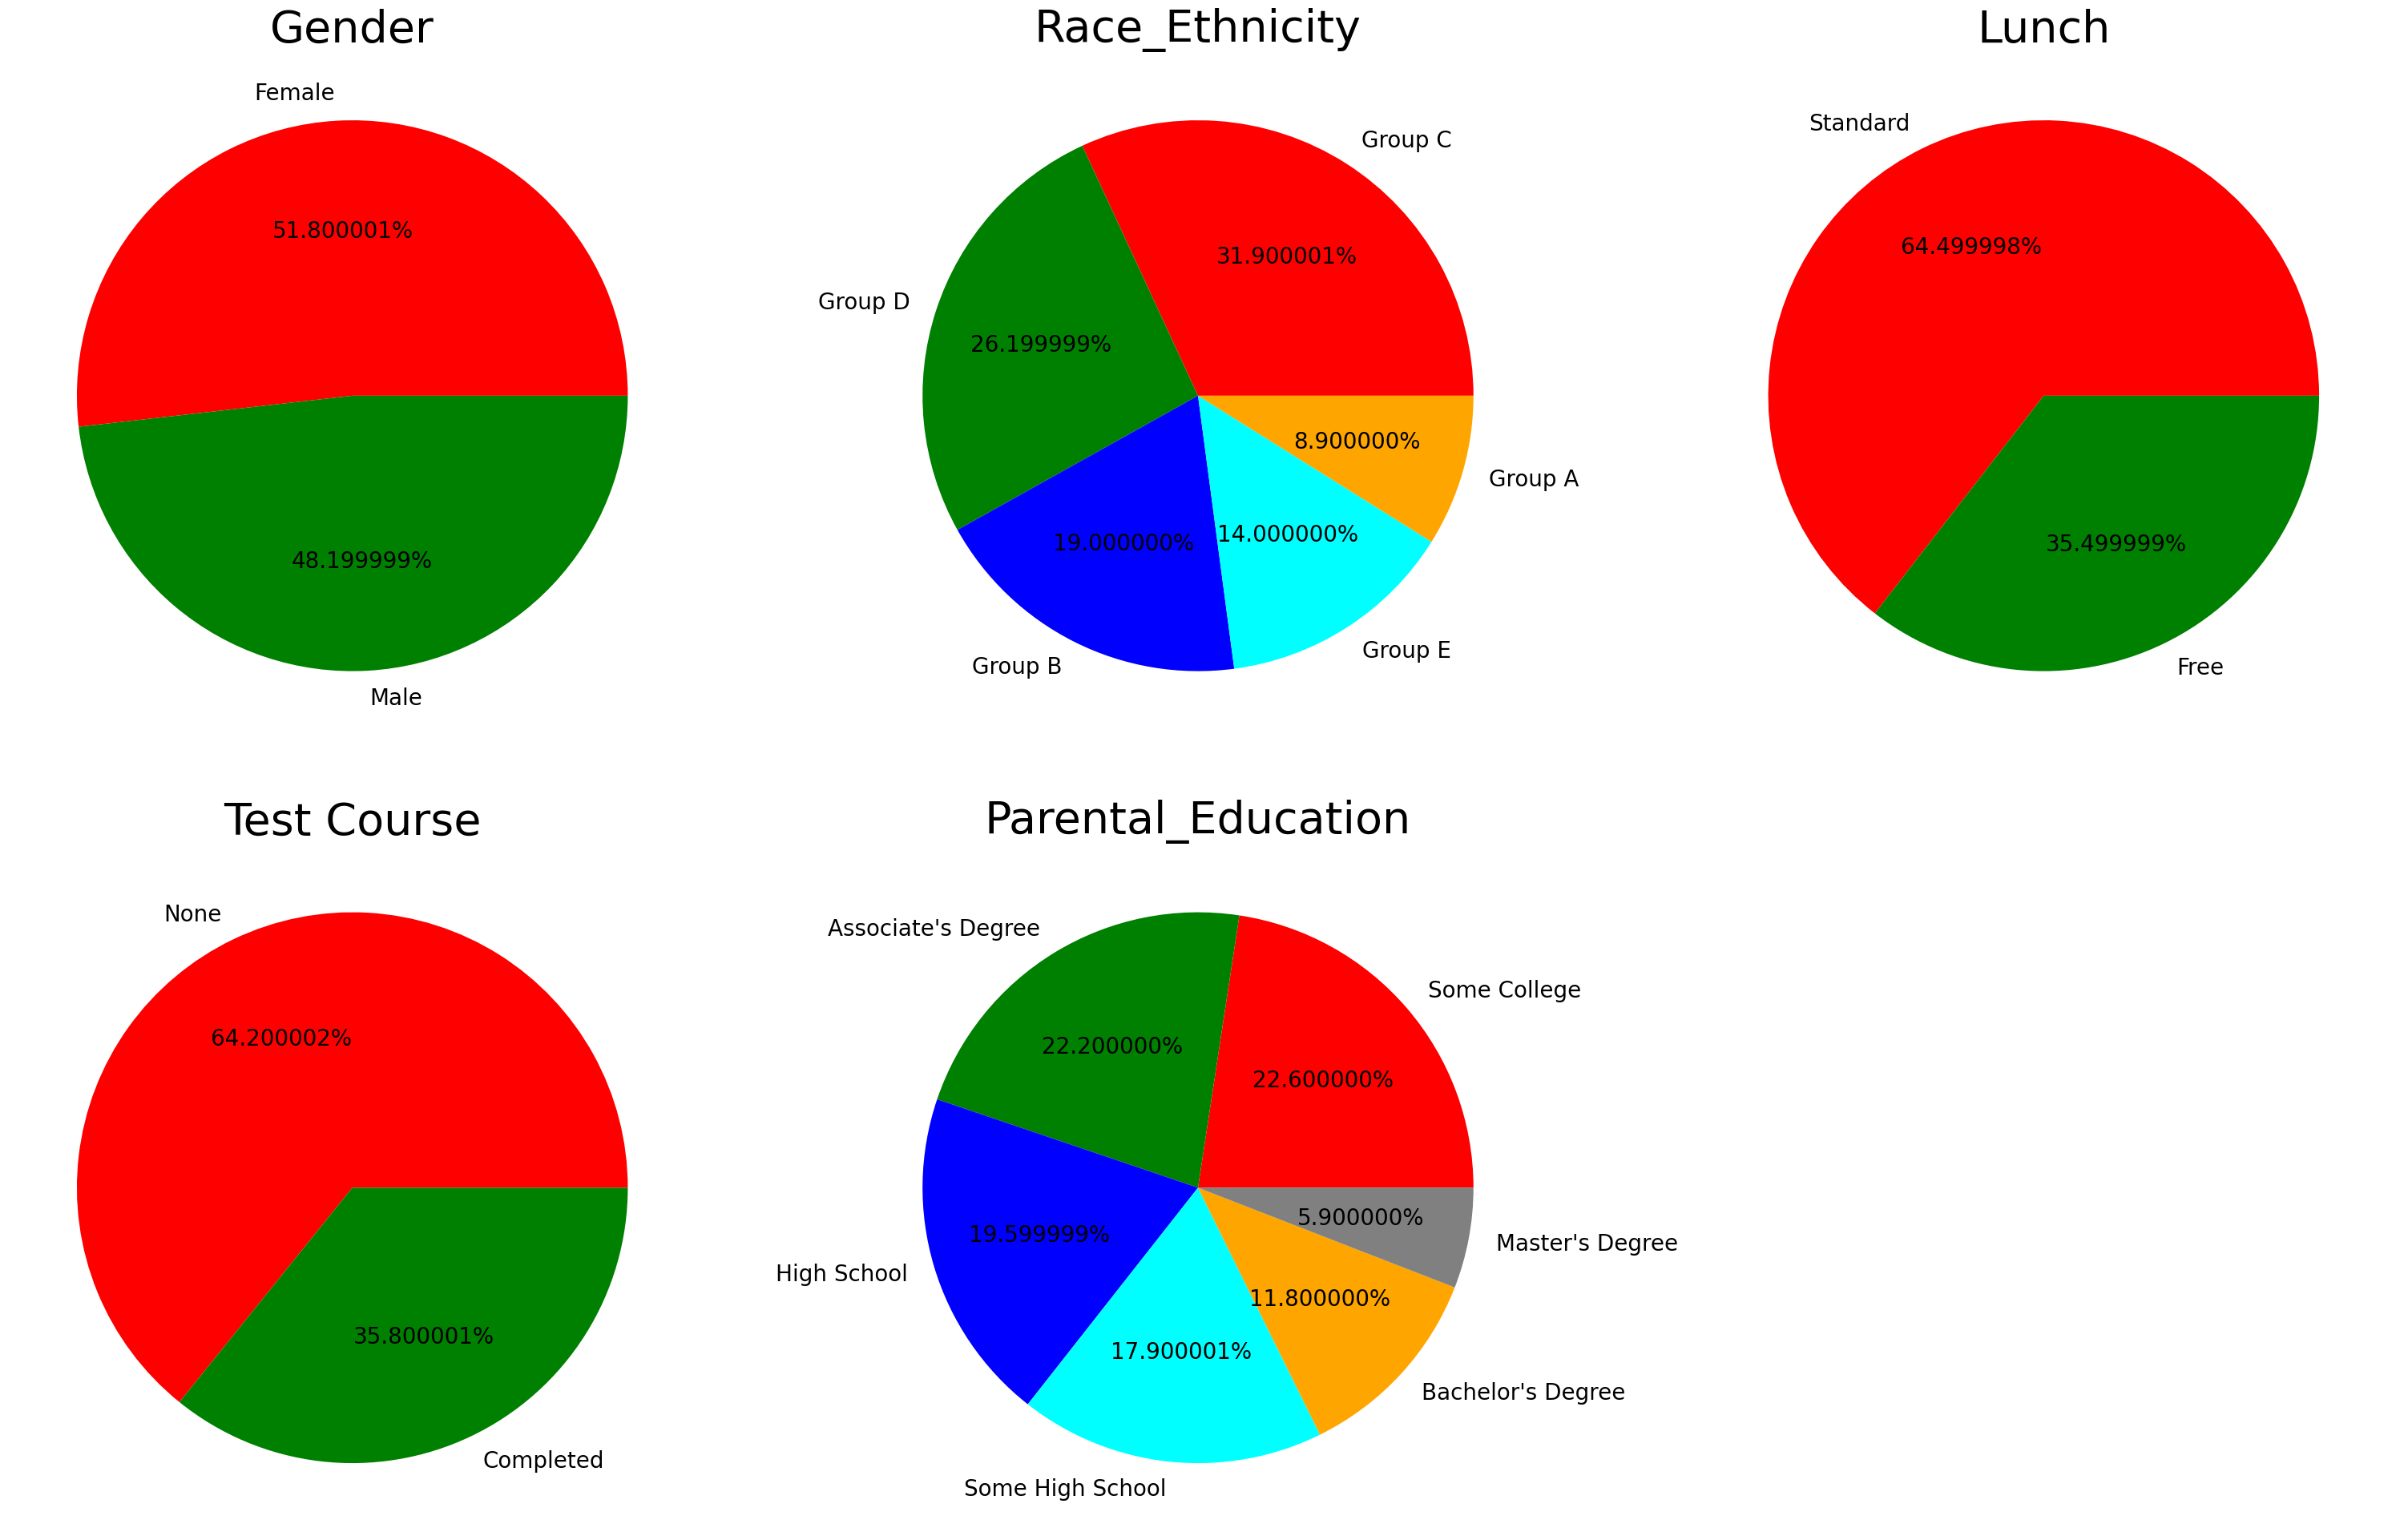

In [105]:
plt.rcParams['figure.figsize'] = (30, 20)
# fig, axe = plt.subplots(2,3)

#gender
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%', textprops={'fontsize': 20})
plt.title('Gender', fontsize = 40)
plt.axis('off')


#race_ethnicity
plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%', textprops={'fontsize': 20})
plt.title('Race_Ethnicity', fontsize = 40)
plt.axis('off')


#lunch
plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%', textprops={'fontsize': 20})
plt.title('Lunch', fontsize = 40)
plt.axis('off')


#test preparation
plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%', textprops={'fontsize': 20})
plt.title('Test Course', fontsize = 40)
plt.axis('off')


#parent education
plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%', textprops={'fontsize': 20})
plt.title('Parental_Education', fontsize = 40)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### 4.4 Checking outliers

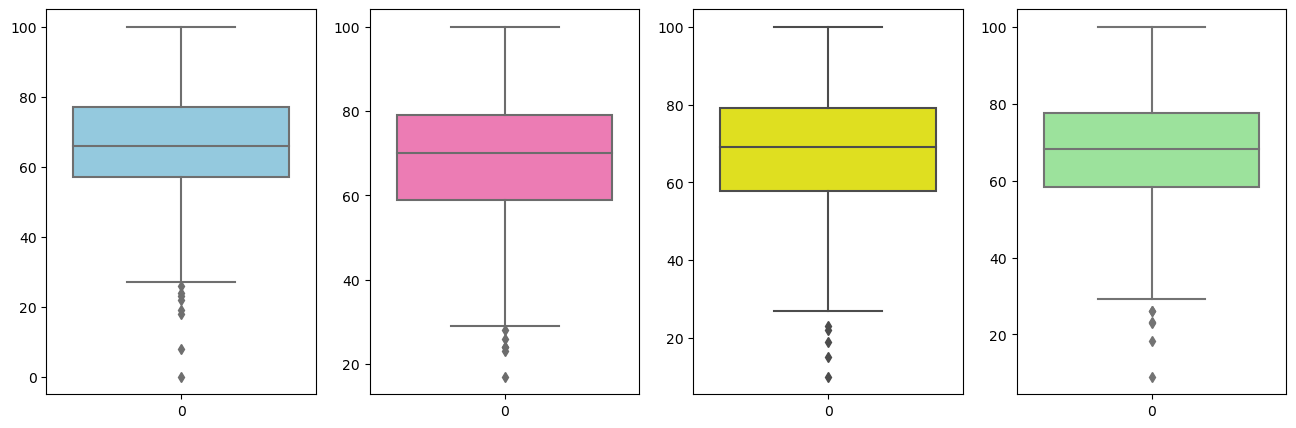

In [124]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


### 4.5 Multivariate analysis with pairplot

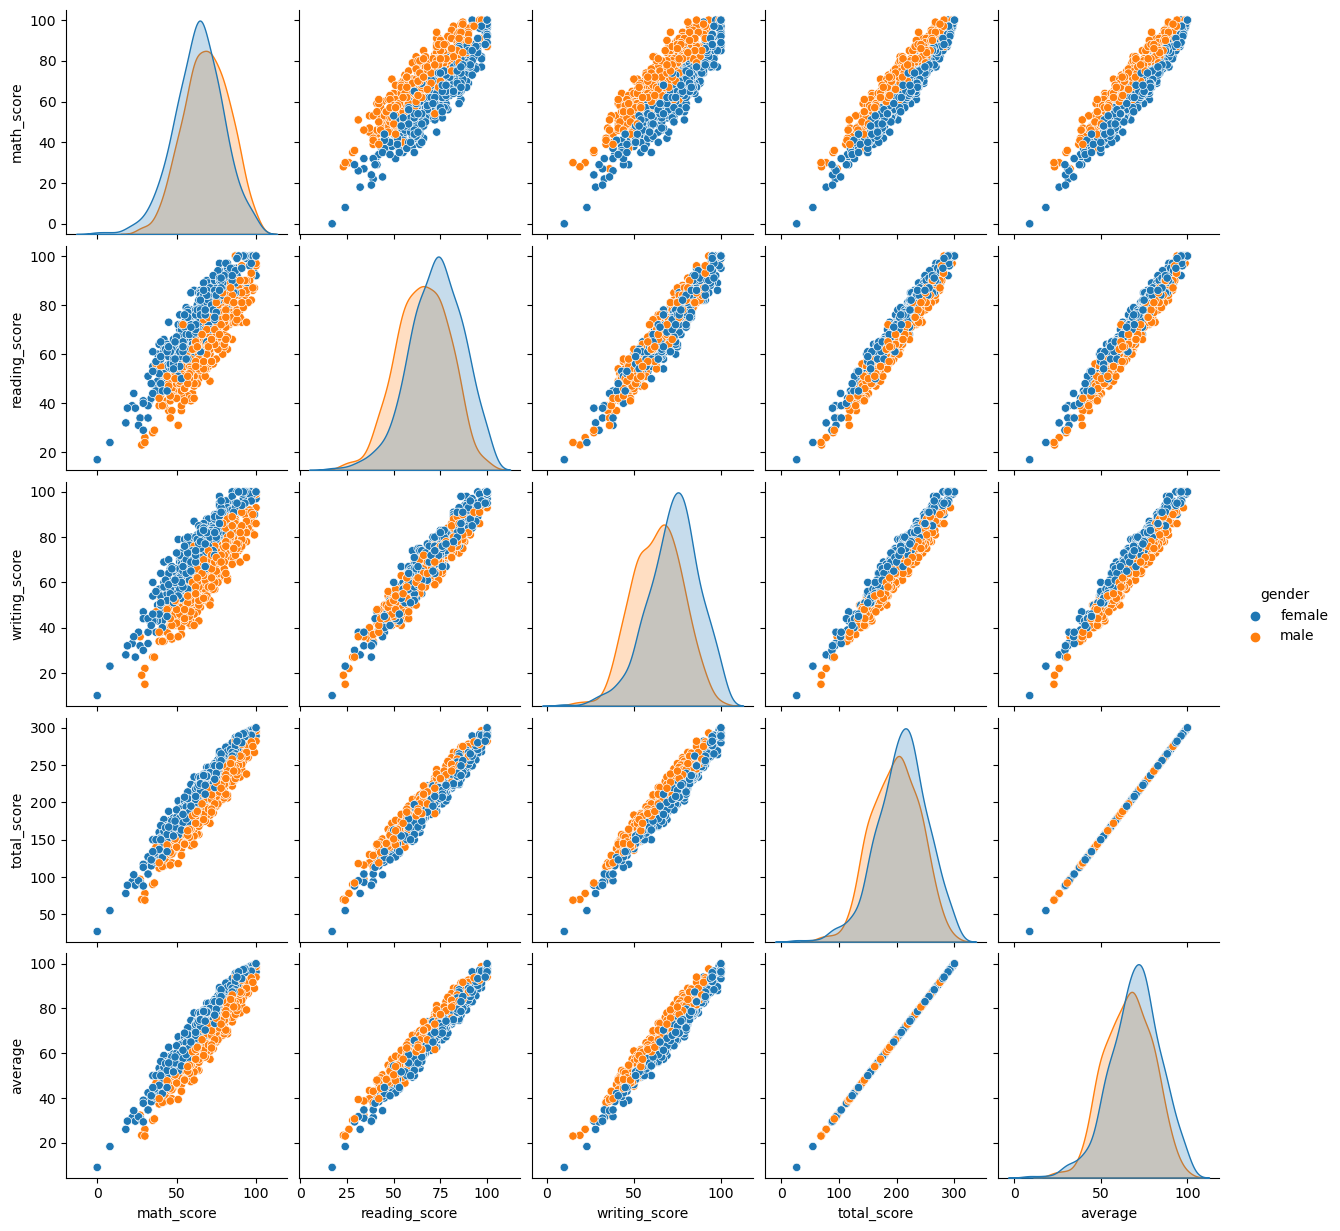

In [113]:
sns.pairplot(df,hue = 'gender')
plt.show()
